

# DataSet Name: Airline Passenger Satisfaction

# DataSet Description: 

Our dataset consists of feedback from more than 120,000 airline passengers. Each passenger has provided reviews on different aspects of their travel experience such as cleanliness, comfort, service quality, and overall satisfaction. The dataset also contains demographic information about each passenger, details about their flights, and the purpose of their travel. The objective is to build a powerful machine-learning model to predict satisfaction or Dissatisfaction of airline passengers drawing on various features and factors present in the dataset.

# Problem Statement:
Developing a predictive model using machine learning to assess airline passengers' satisfaction by considering their demographic details, flight information, and evaluations of various aspects of the travel experience. Ultimately aiming to accurately categorize passengers into satisfied or dissatisfied groups based on their ratings to reveal prominent contributors influencing passenger contentment hence guiding airlines in enhancing overall service quality and delivering optimal customer experiences.
    
## DataSet URL: https://mavenanalytics.io/data-playground?page=6&pageSize=5



In [56]:
# Importing all the libraries that we'll be using throughout this pipeline notebook:

# Data Manipulation Library 
import pandas as pd

#   Data Visualization Libraries
import seaborn as sbn
import matplotlib.pyplot as plot_lib

# Data mining and analysis Libraries  
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score




# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Handling warning messages for future warning 
import warnings




In [57]:
# Reading dataset files using pandas manipulation library as pd
df = pd.read_csv("airline_passenger_satisfaction.csv")
# Displaying the top five rows of the dataset by using the head function 
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [58]:
# Droping ID feature column as there is no such need for the ID column
df.drop('ID', axis=1, inplace=True)

In [59]:
# Displaying the number of ROWs and COLUMNS of the dataset by using the shape function
df.shape

(129880, 23)

In [60]:
# Let's find out  the duplicate values 
df.duplicated().sum()

0

In [61]:
# Assuming df is your DataFrame
null_values_counts = df.isnull().sum()
print("The name and number of null values in it ")
for col, null_values_counts in null_values_counts.items():
    if null_values_counts > 0:
        print(f"{col}\t{null_values_counts}")
    

The name and number of null values in it 
Arrival Delay	393


In [62]:
# Let's analyze the Arrival Delay feature and handle the null values which we have found above 
Arrival_Delay = df['Arrival Delay']

# # Defining a variable for the total number of values in an Arrival Delay
total_sum_Arrival_Delay = Arrival_Delay.sum()


# # Defining a variable for the total number of null values in an Arrival Delay 
null_count_Arrival_Delay = Arrival_Delay.isnull().sum()

# # Defining a variable to calculate the percentage of the null values in an Arrival Delay
percentage_null_Arrival_Delay = (null_count_Arrival_Delay / total_sum_Arrival_Delay )* 100

# # Printing Each of them
print(f"Total sum of values : {total_sum_Arrival_Delay}")
print(f"Total number of null values : {null_count_Arrival_Delay}")
print(f"Percentage of null values : {percentage_null_Arrival_Delay:.2f}%")

Total sum of values : 1954105.0
Total number of null values : 393
Percentage of null values : 0.02%


In [63]:
# There is just 0.02% of Null values in Arrival Delay so let's drop the the null values
df = df.dropna(subset=['Arrival Delay'])
df2 = df['Arrival Delay']
# Print the shape of the dataset again
print("Totla Null values in Arrival Delay :", df2.isna().sum())


Totla Null values in Arrival Delay : 0


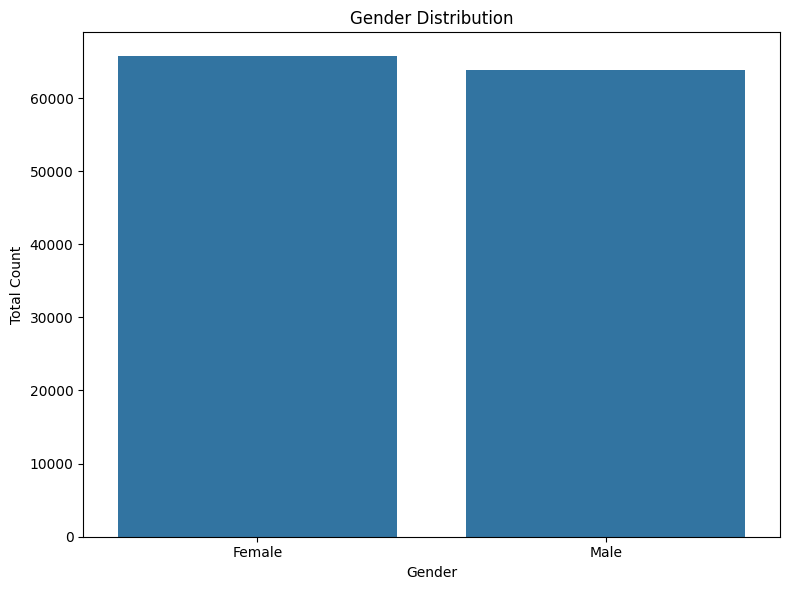

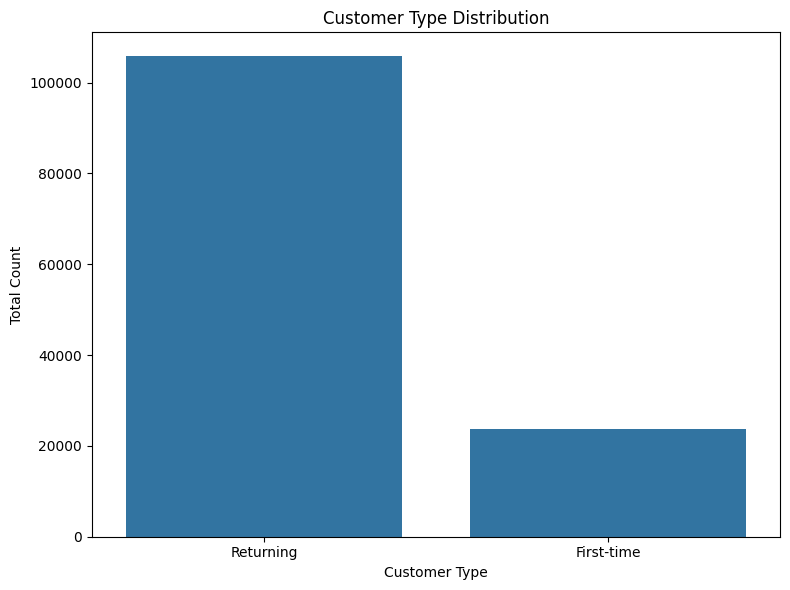

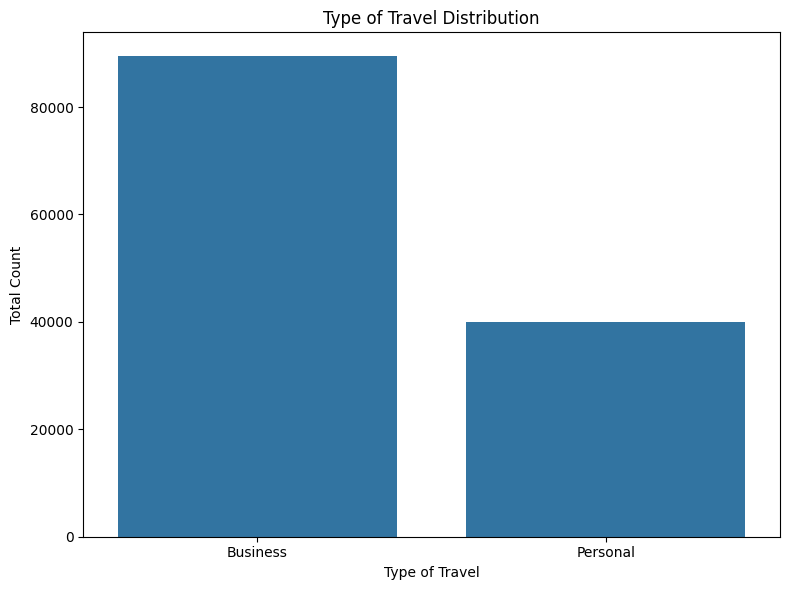

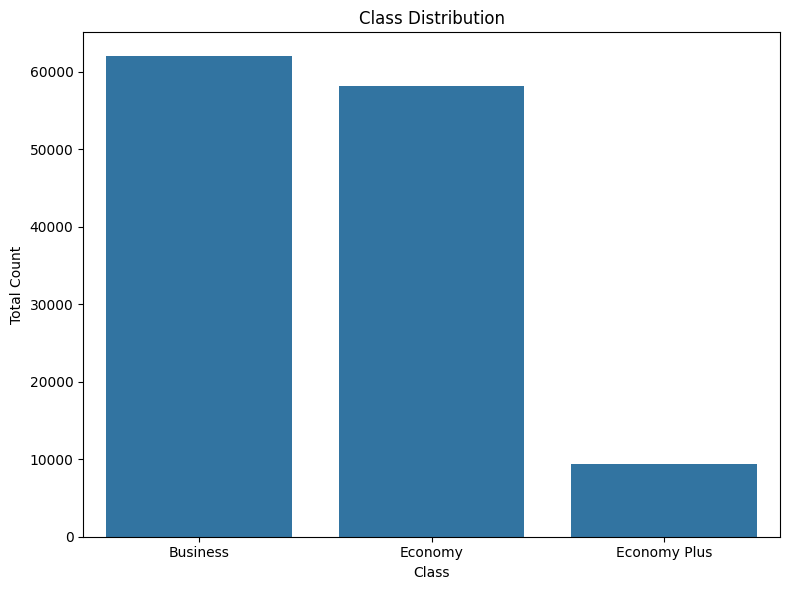

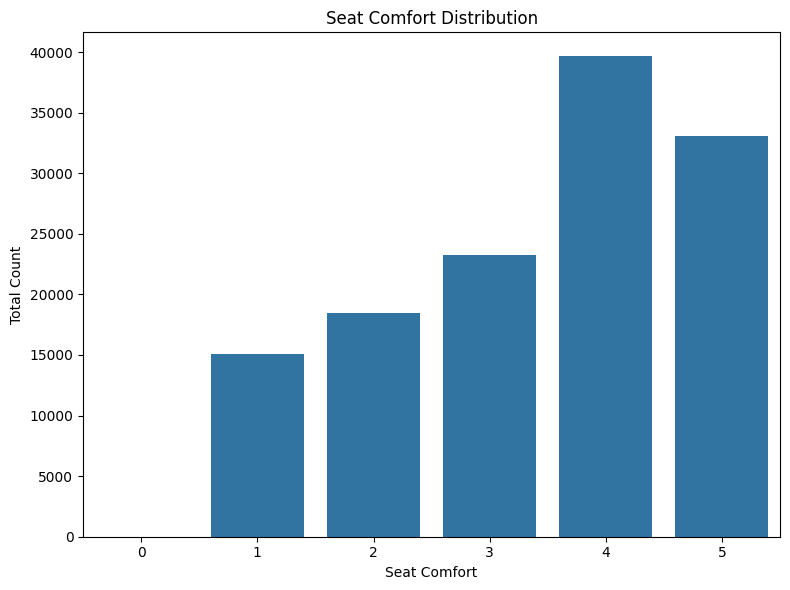

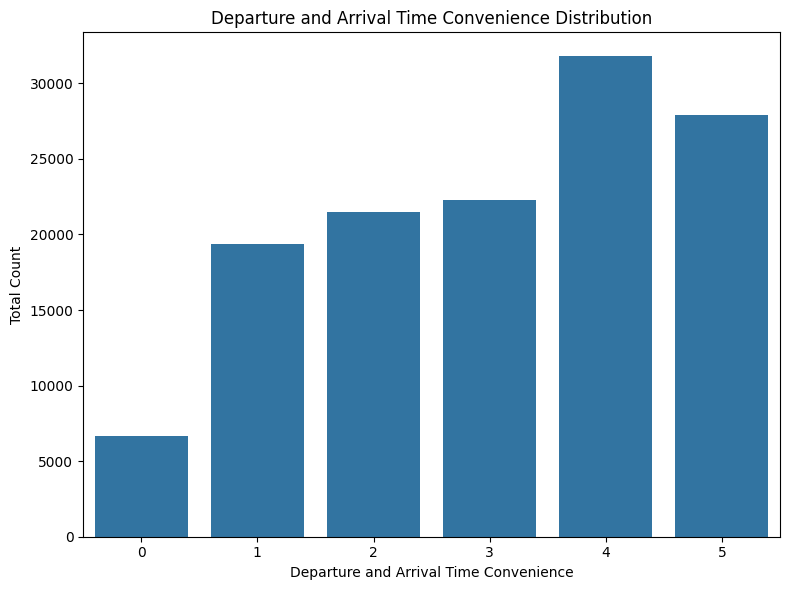

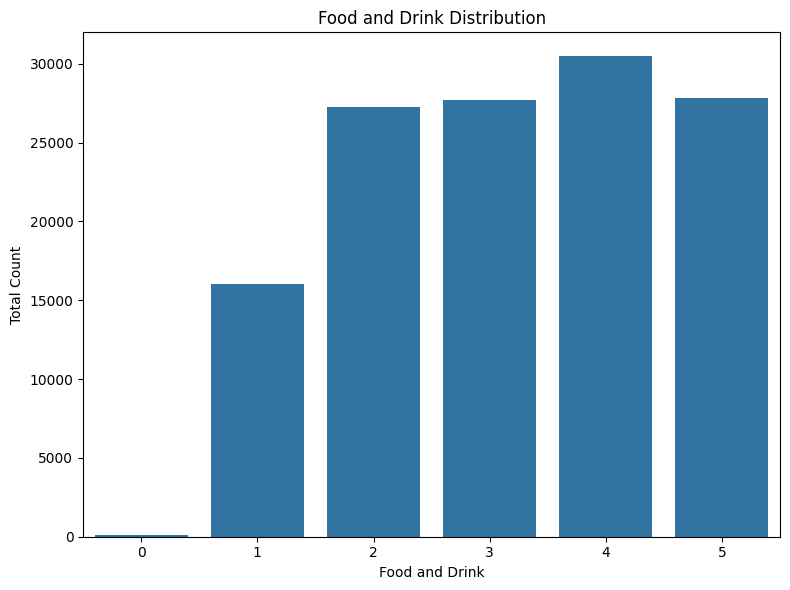

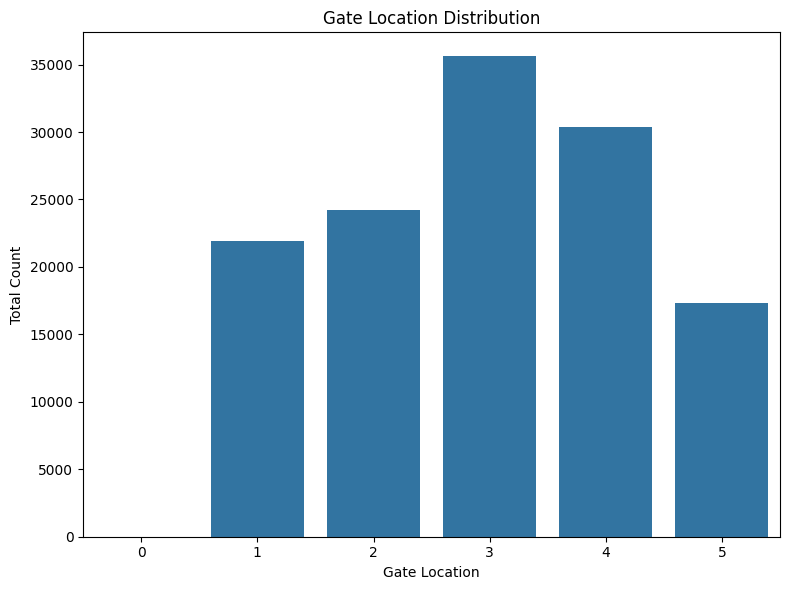

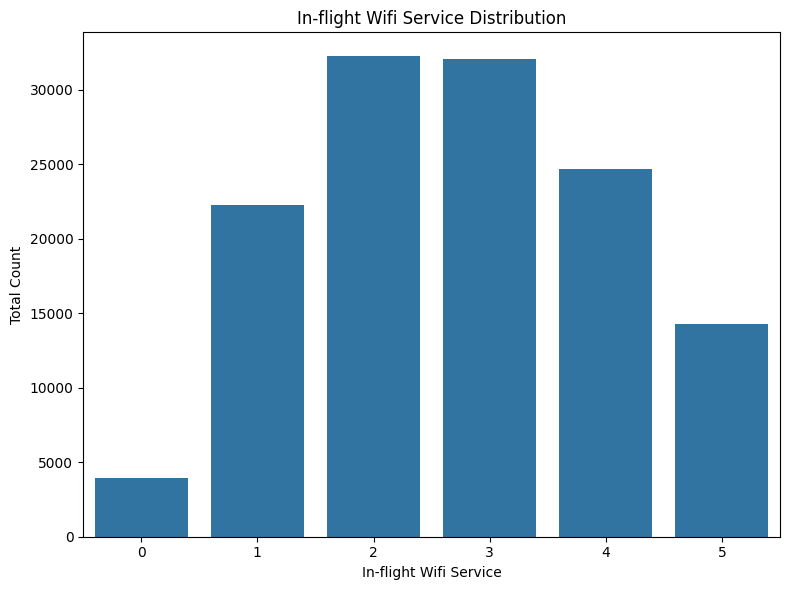

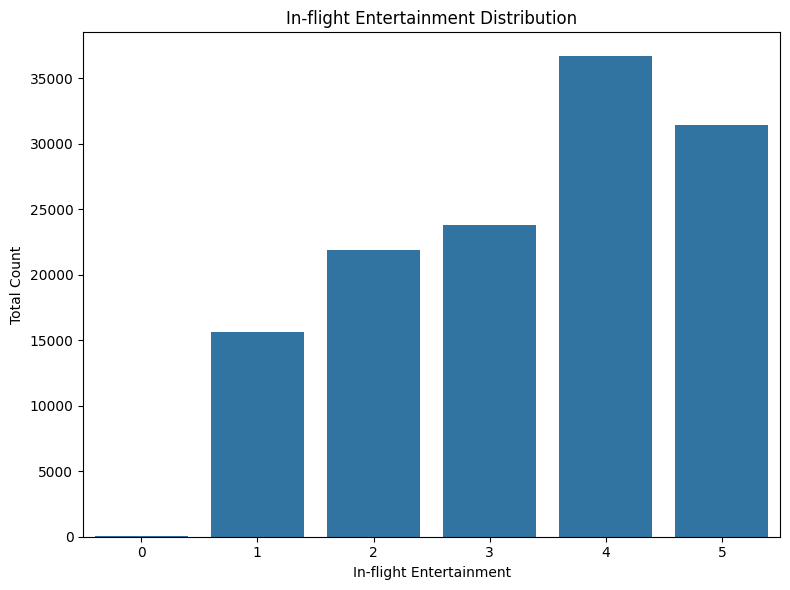

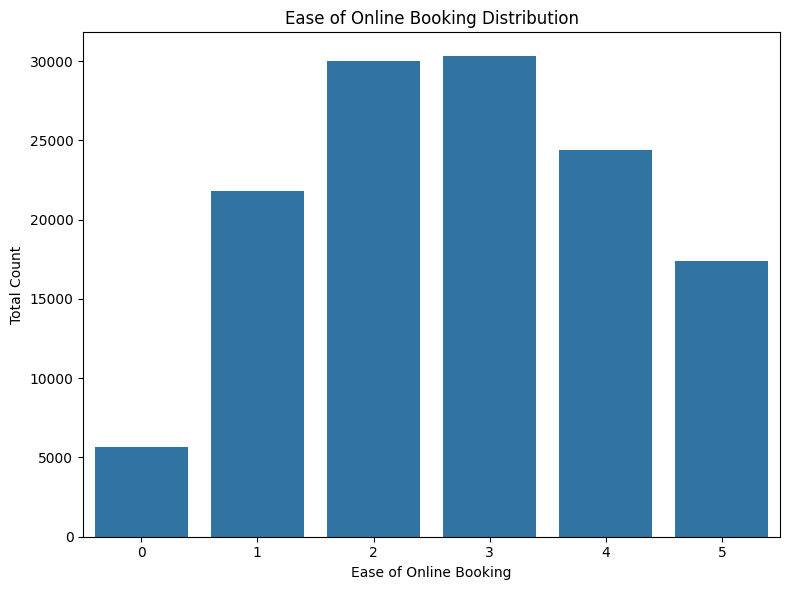

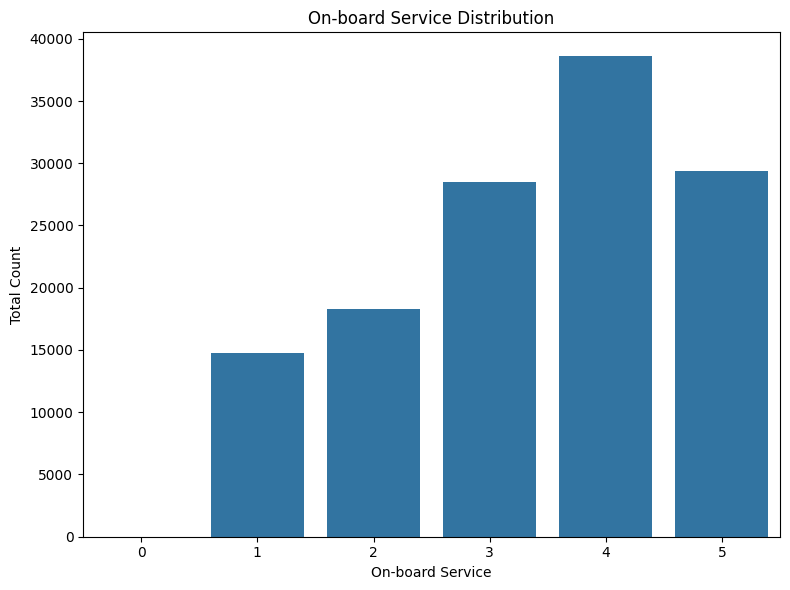

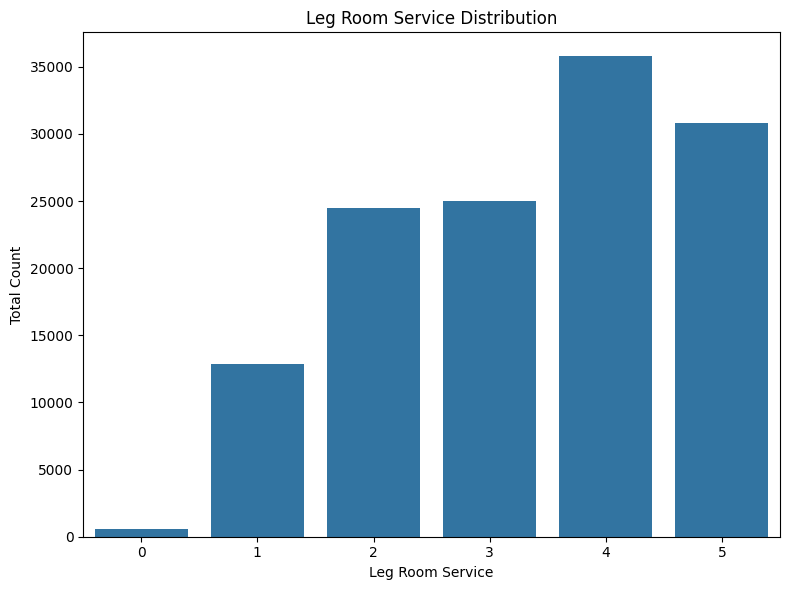

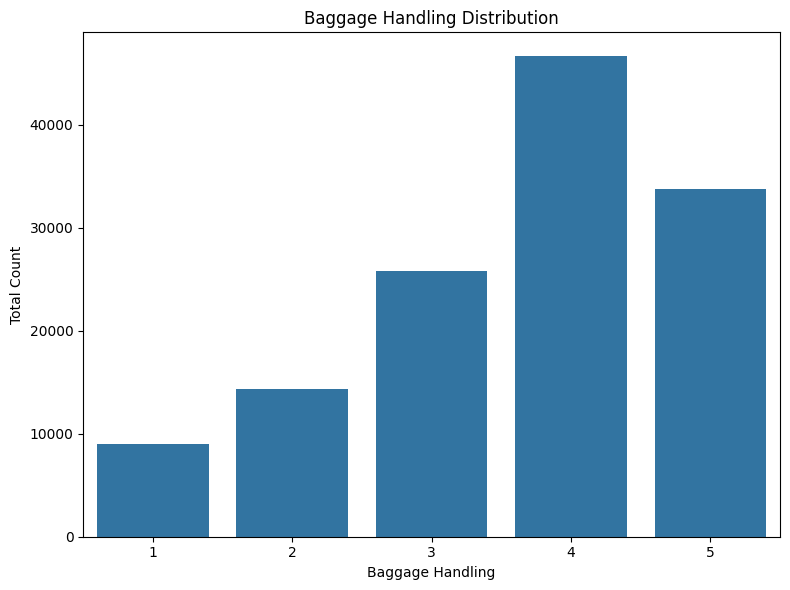

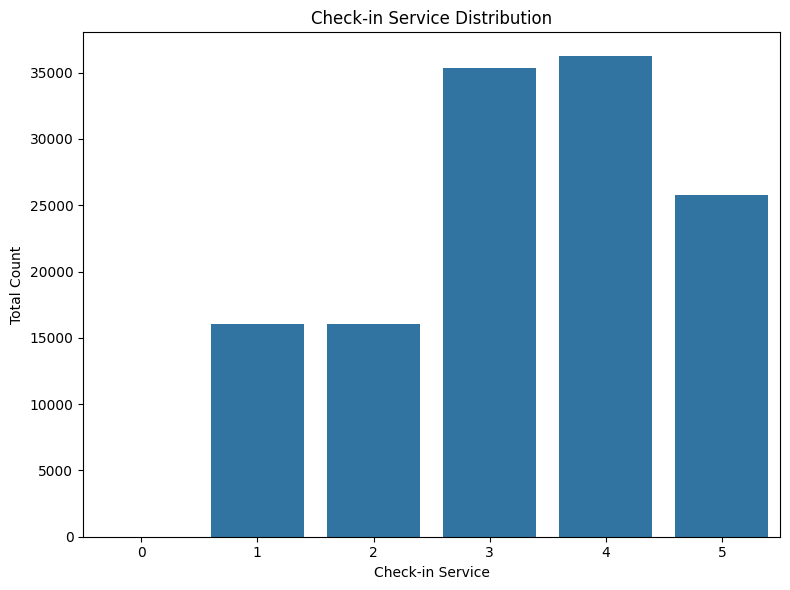

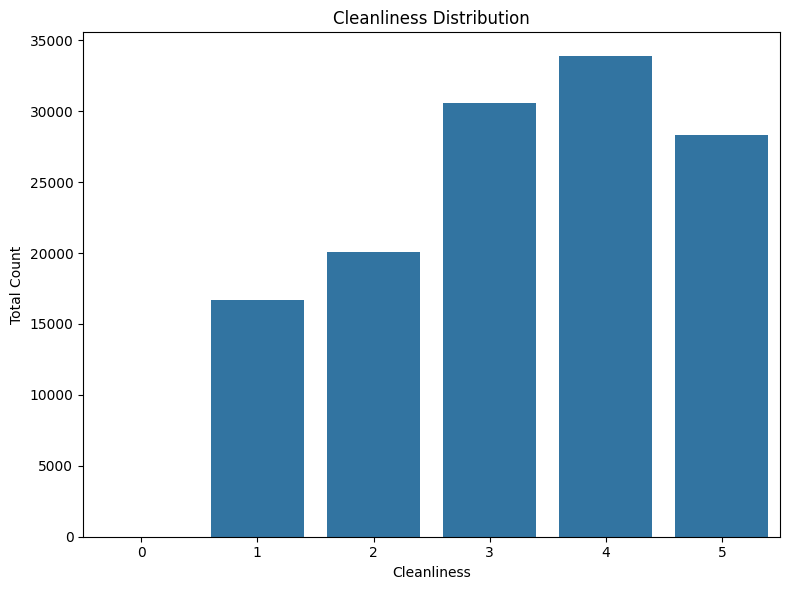

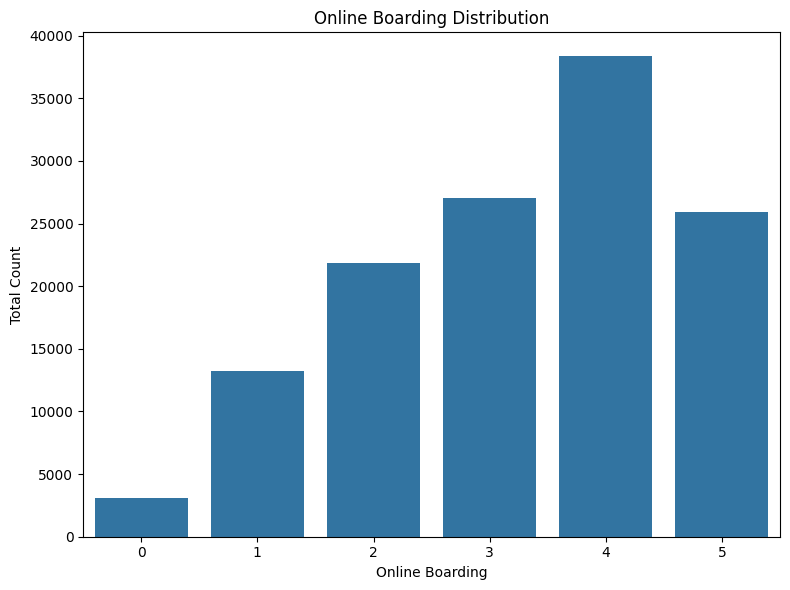

In [64]:
# let's Analyse the Distribution of all the categorical values first 

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat Comfort',
                       'Departure and Arrival Time Convenience', 'Food and Drink', 'Gate Location',
                       'In-flight Wifi Service', 'In-flight Entertainment', 
                       'Ease of Online Booking', 'On-board Service', 'Leg Room Service',
                       'Baggage Handling', 'Check-in Service', 'Cleanliness', 'Online Boarding']



# for loop to display the barplot for each feature 
for feature in categorical_features:
    # Create a new figure
    plot_lib.figure(figsize=(8, 6))
    
    # Variable to store the value count 
    t_value_counts = df[feature].value_counts()
    
   # ploting the bar plot 
    sbn.barplot(x=t_value_counts.index, y=t_value_counts.values)
    
    # Defining the title and labels 
    plot_lib.title(f'{feature} Distribution')
    plot_lib.xlabel(feature)
    plot_lib.ylabel('Total Count')
    
    
    
    # Display Barplot
    plot_lib.tight_layout()
    plot_lib.show()

In [65]:
# The unique  0 in rating features has a very small number count so it can also be considered as 1 the lowest rating of each feature 

# Deifning a Cluster mapping to map 0 value to 1
cluster_mapping = {
    'Seat Comfort': {0: 1},
    'Departure and Arrival Time Convenience': {0: 1},
    'Food and Drink': {0: 1},
    'Gate Location': {0: 1},
    'In-flight Wifi Service': {0: 1},
    'In-flight Entertainment': {0: 1},
    'Ease of Online Booking': {0: 1},
    'On-board Service': {0: 1},
    'Leg Room Service': {0: 1},
    'Baggage Handling': {0: 1},
    'Check-in Service': {0: 1},
    'Cleanliness': {0: 1},
    'Online Boarding': {0: 1}
}

# Updating the cluster mapping using lambda
for column, mapping in cluster_mapping.items():
    df[column] = df[column].apply(lambda x: mapping.get(x, x))

In [66]:
# Display the Rating feature again to check the Unique Values 
for i in ['Gate Location', 'In-flight Wifi Service',  'Ease of Online Booking', 
          'On-board Service', 'Leg Room Service', 'Check-in Service', 'Cleanliness', 'Online Boarding']:
    print(df[i].value_counts())
    print('x' * 50)

Gate Location
3    35611
4    30376
2    24219
1    21927
5    17354
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
In-flight Wifi Service
2    32236
3    32087
1    26158
4    24702
5    14304
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Ease of Online Booking
3    30297
2    29983
1    27474
4    24362
5    17371
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
On-board Service
4    38587
5    29407
3    28460
2    18290
1    14743
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Leg Room Service
4    35779
5    30815
3    24982
2    24469
1    13442
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Check-in Service
4    36229
3    35343
5    25800
1    16059
2    16056
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Cleanliness
4    33871
3    30552
5    28321
2    20049
1    16694
Name: count, dtype: int64
xxxx

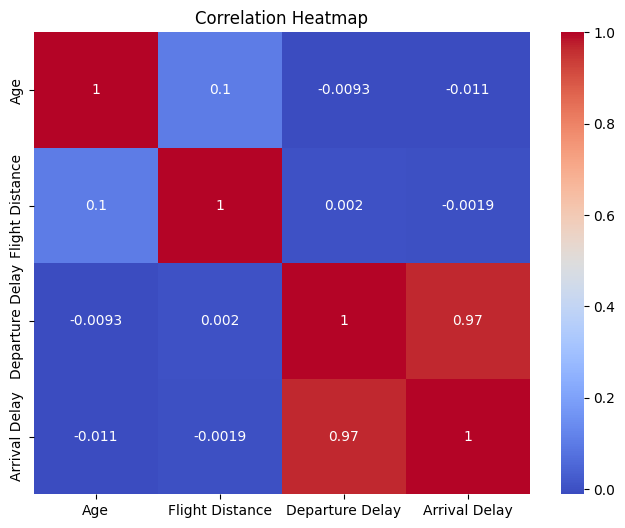

In [67]:
# let's Analyse the correlation matrix for all the features those are in numbers 

numFeat = ["Age", "Flight Distance", "Departure Delay", 'Arrival Delay']

plot_lib.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
matrix_corr = df[numFeat].corr()

#  heatmap using the correlation matrix
sbn.heatmap(matrix_corr, annot=True, cmap='coolwarm')

#  title of the heatmap
plot_lib.title('Correlation Heatmap')

# Display the heatmap
plot_lib.show()

In [68]:
# By Correlation heatmap found that the feature named Arrival Delay and the feature named Departure Delay are 97% similar to each other
# So by this, we can drop one feature 
# let's  Drop the Arrival Delay
df.drop('Arrival Delay', axis=1, inplace=True)

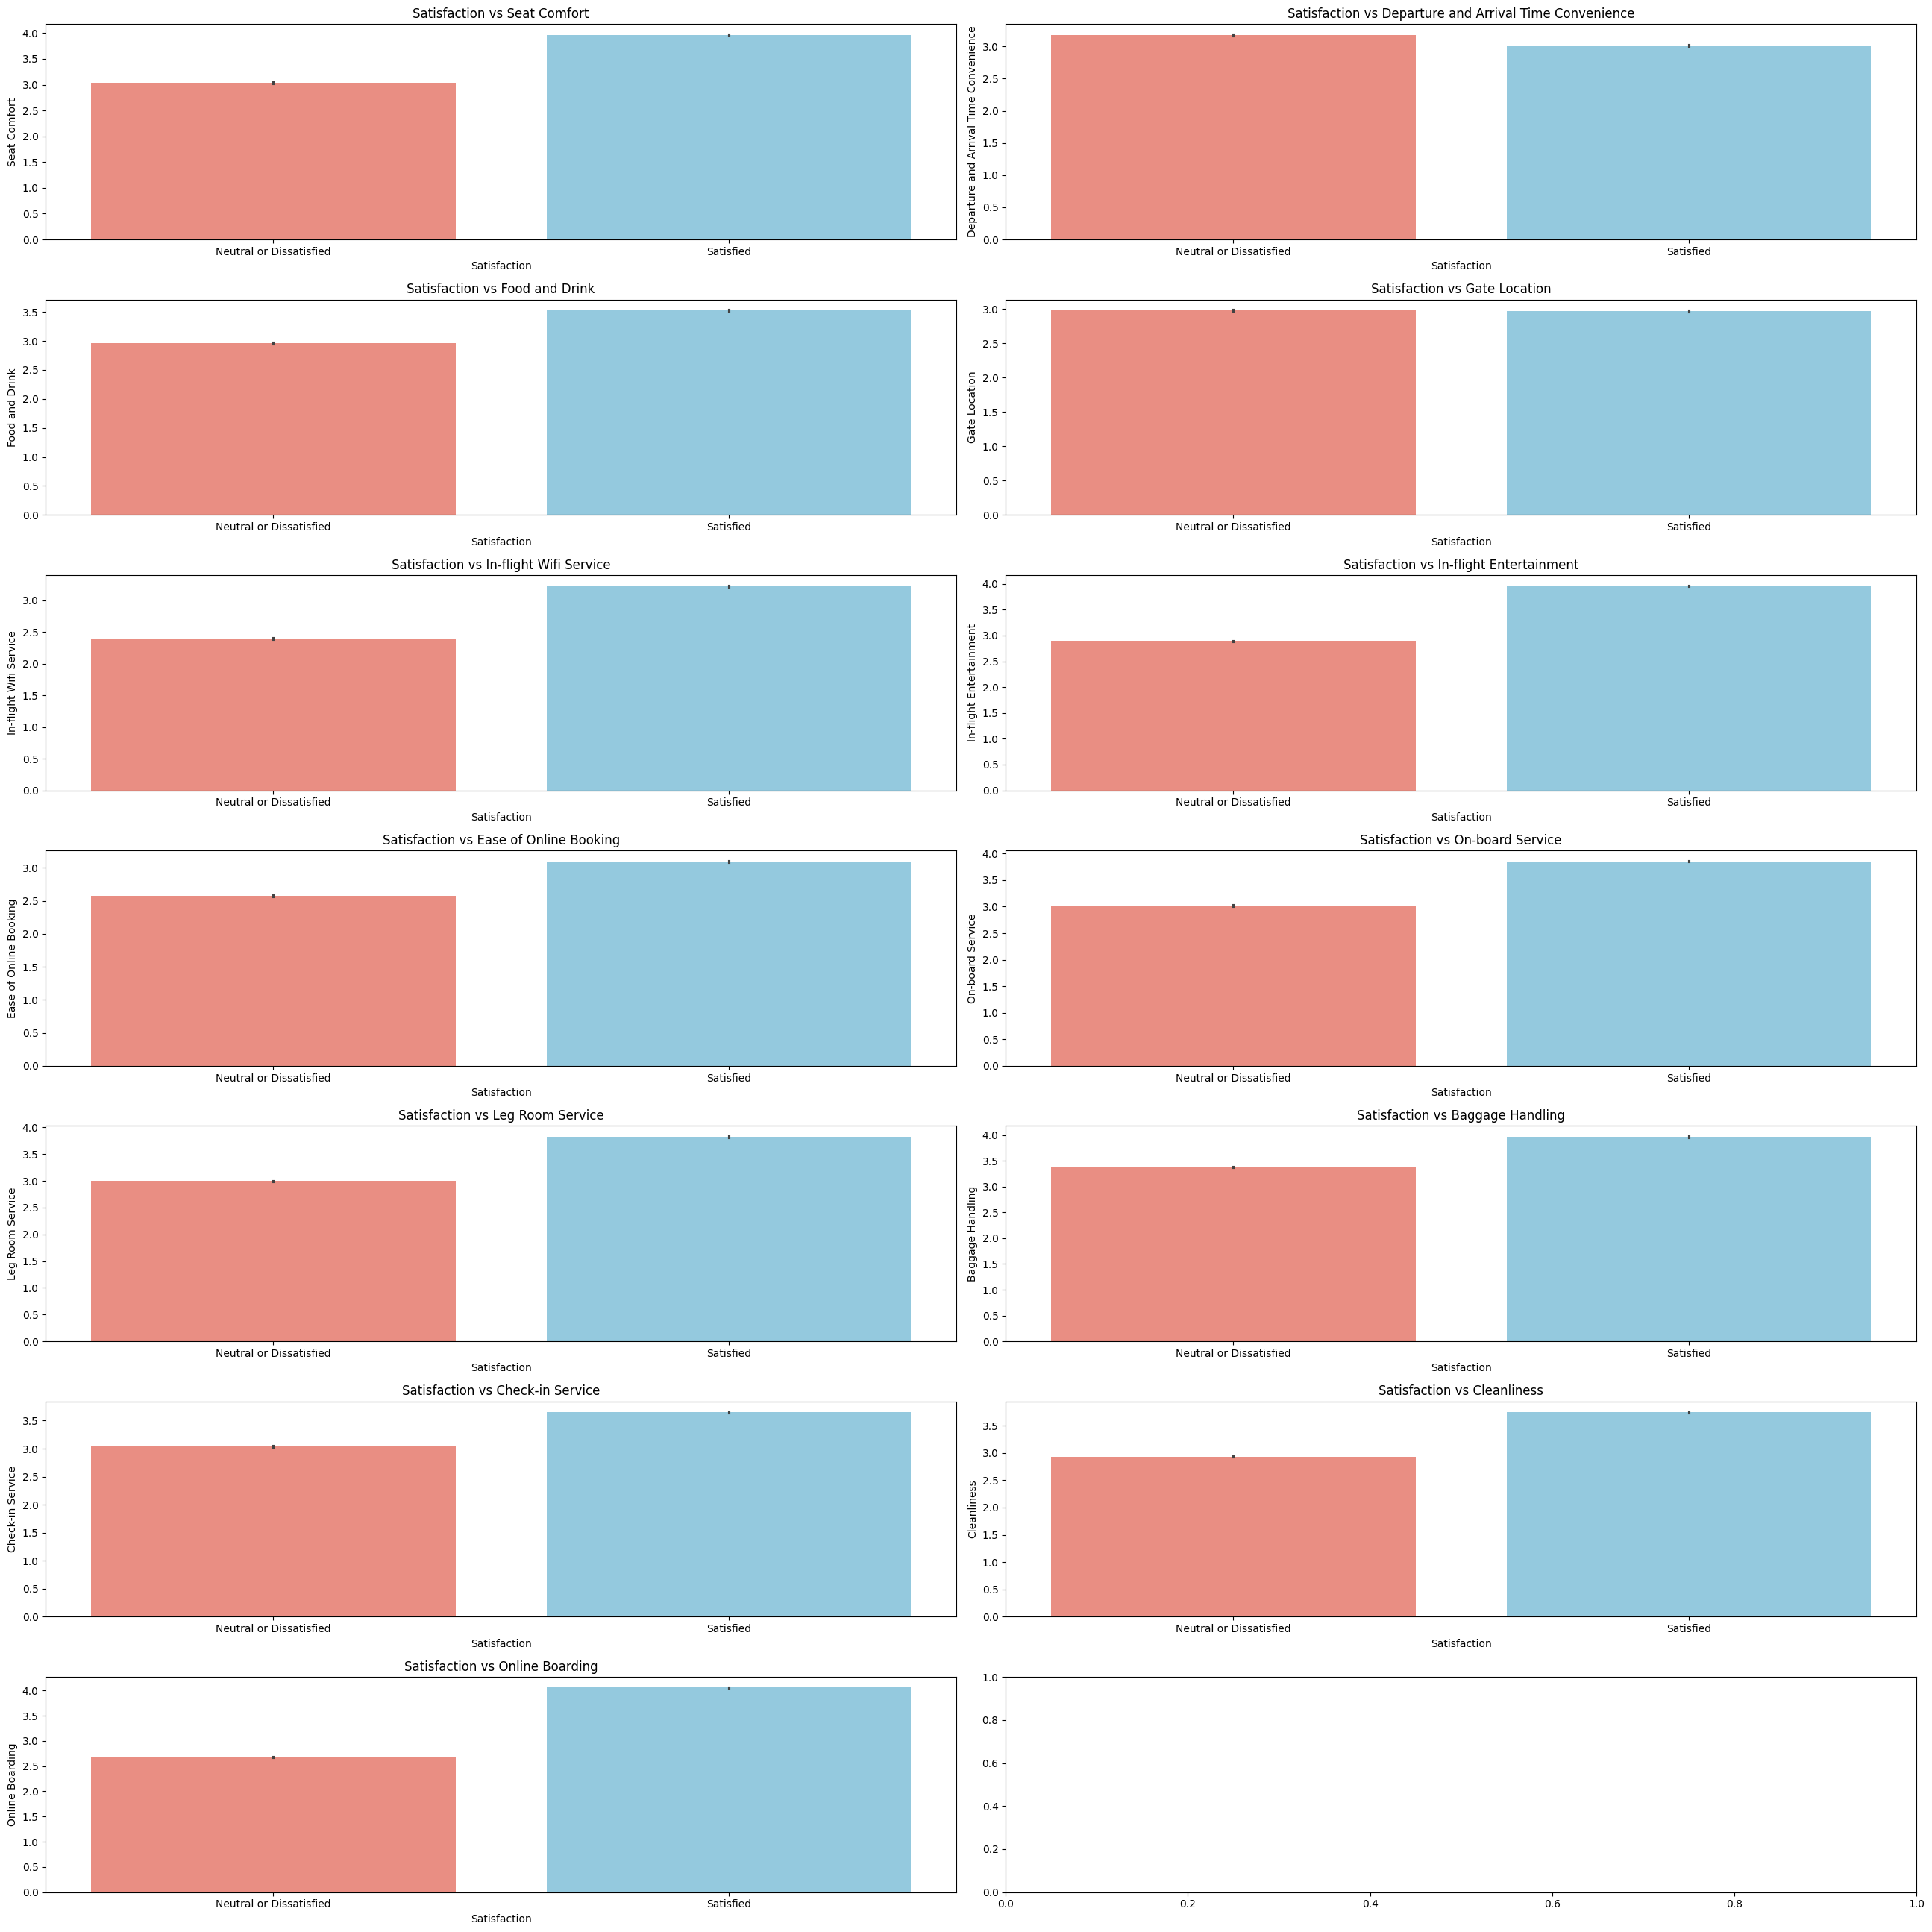

In [69]:
# Let's check the relation of each rating column with the target variable to see if they are balanced or unbalanced 

rating_feat = ['Seat Comfort', 'Departure and Arrival Time Convenience', 'Food and Drink', 'Gate Location', 
                   'In-flight Wifi Service', 'In-flight Entertainment',  'Ease of Online Booking',
                   'On-board Service', 'Leg Room Service', 'Baggage Handling', 'Check-in Service', 'Cleanliness',
                   'Online Boarding']

# Setting up sizes and axes of a subplot 
fig, axes = plot_lib.subplots(nrows=7, ncols=2, figsize=(26, 26))

# For loop to create a barplot for each feature with the target feature 
for i, feature in enumerate(rating_feat):
    t_row, t_col = divmod(i, 2)
    sbn.barplot(x='Satisfaction', y=feature, data=df, ax=axes[t_row, t_col], palette=['salmon', 'skyblue'])

   # Setting titles and Labels 
    axes[t_row, t_col].set_title(f'Satisfaction vs {feature}')
    axes[t_row, t_col].set_xlabel('Satisfaction')
    axes[t_row, t_col].set_ylabel(feature)

# Adjusting the layout of subplot 
plot_lib.tight_layout()

# Display the plots
plot_lib.show()

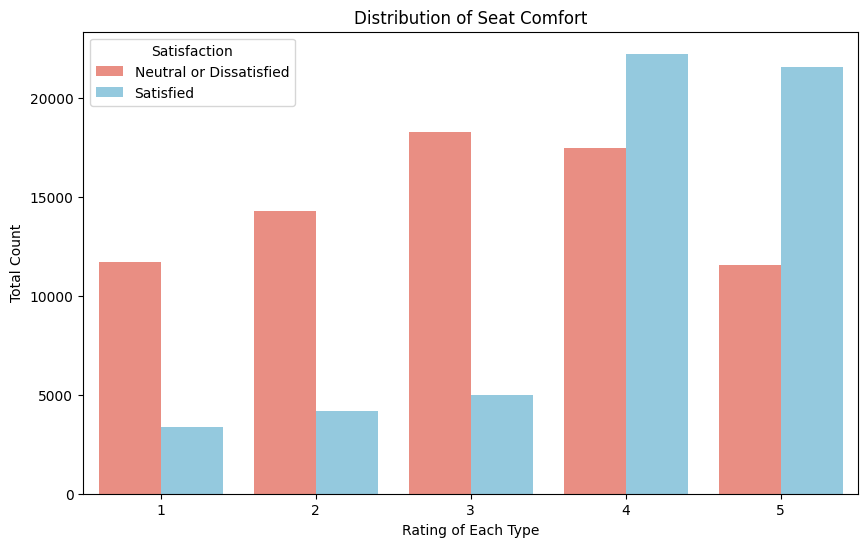

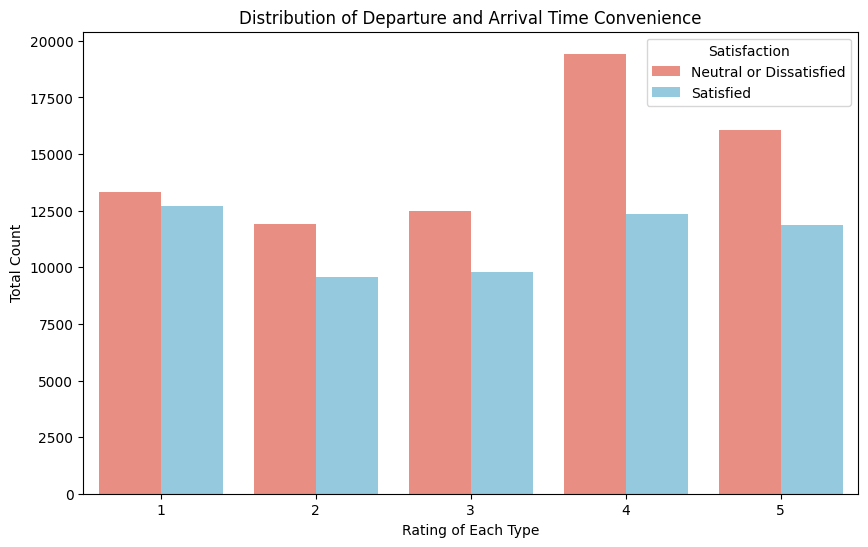

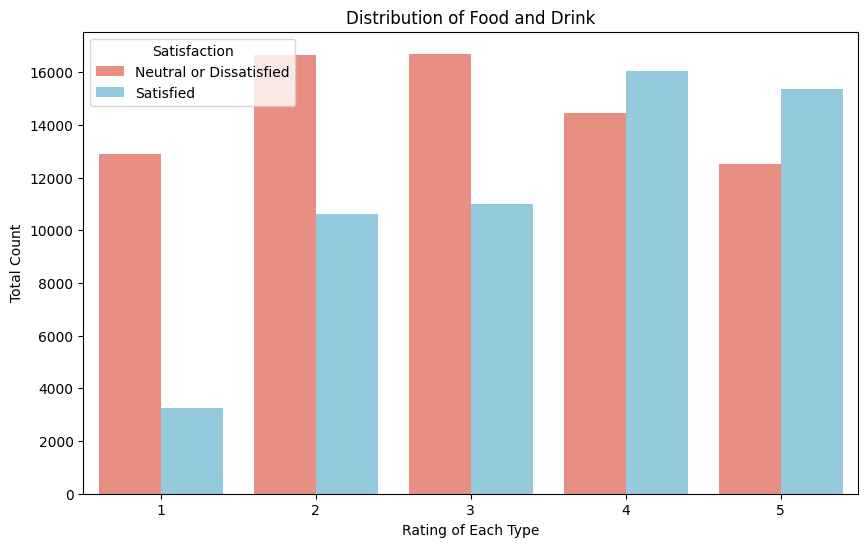

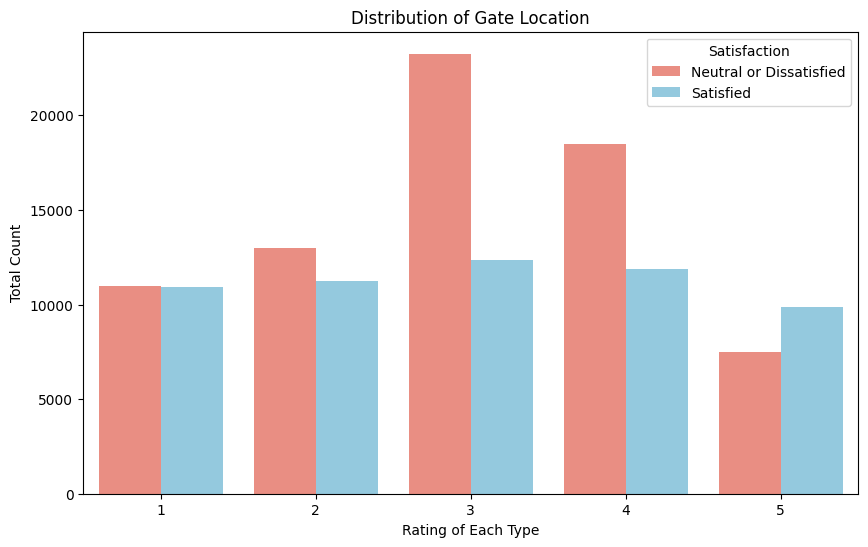

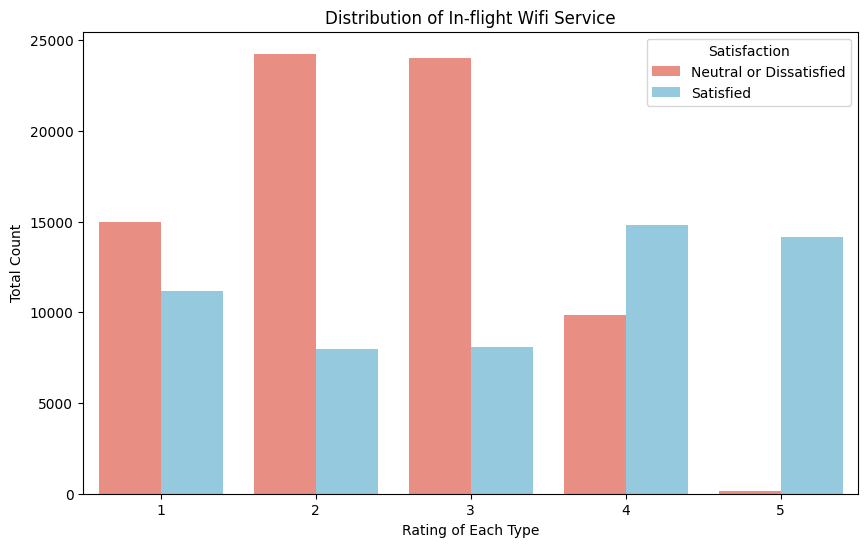

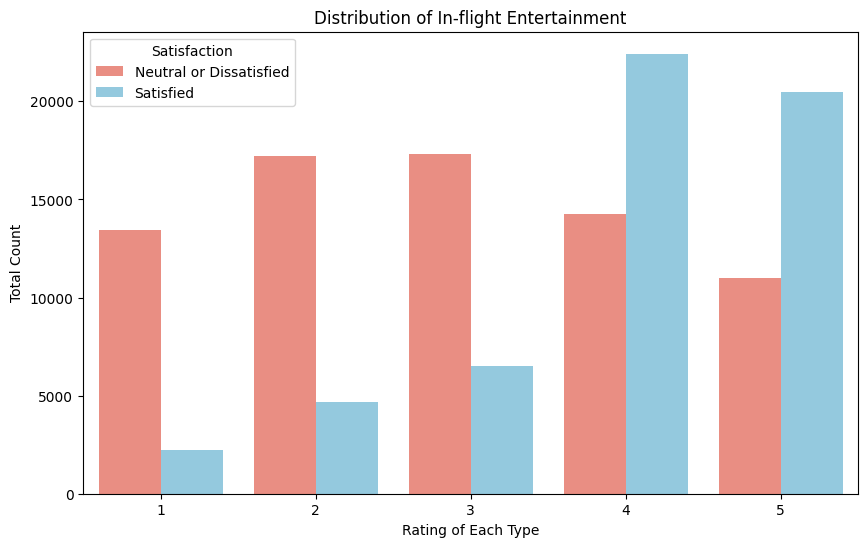

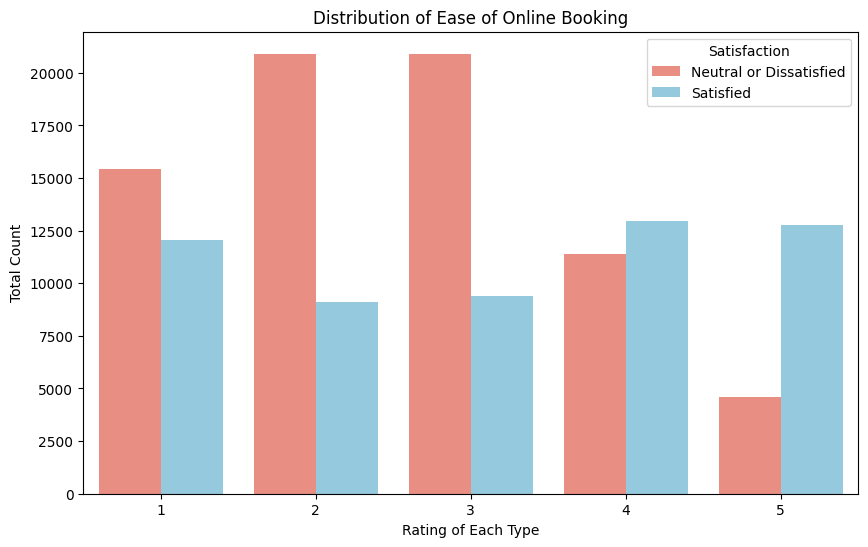

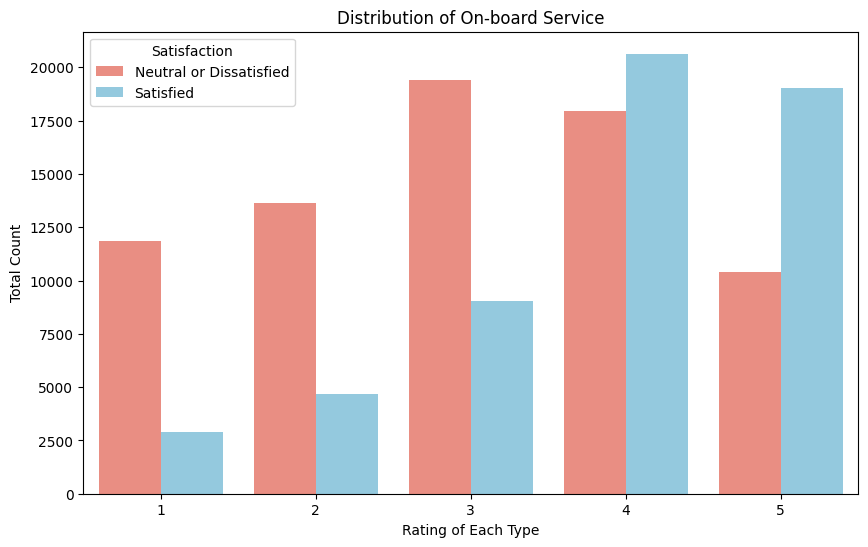

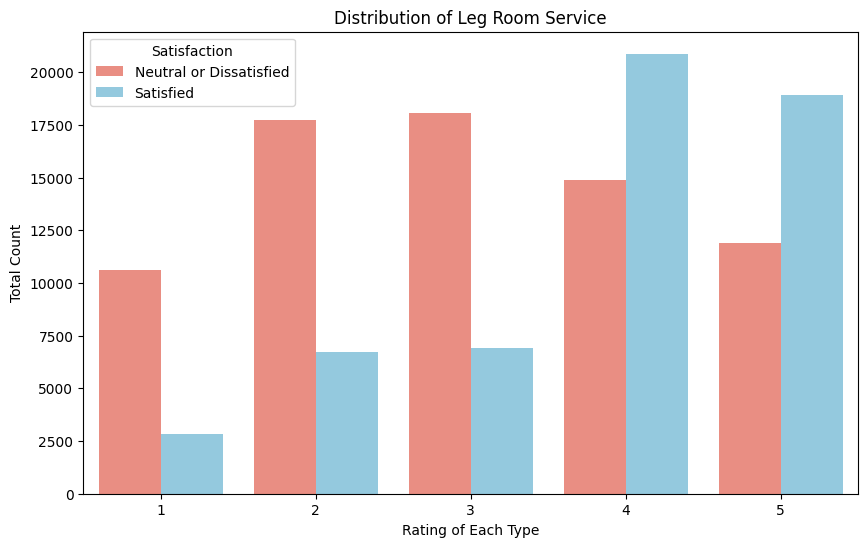

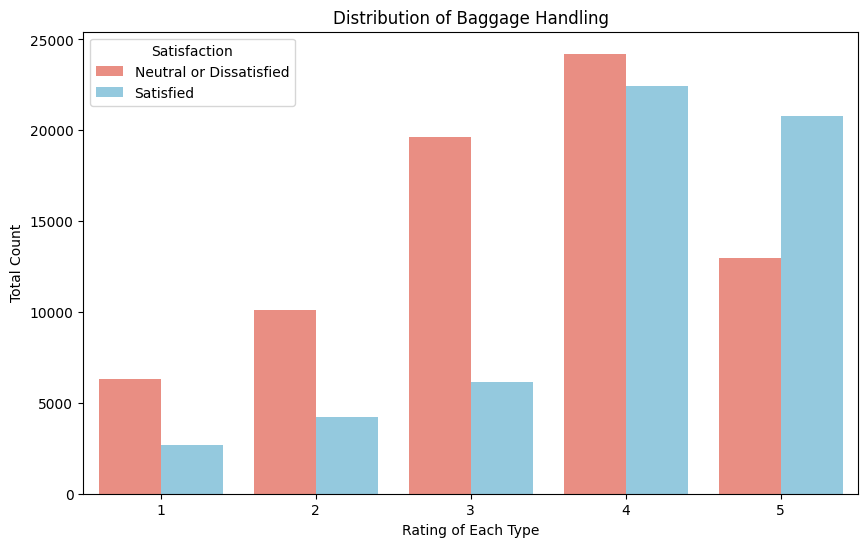

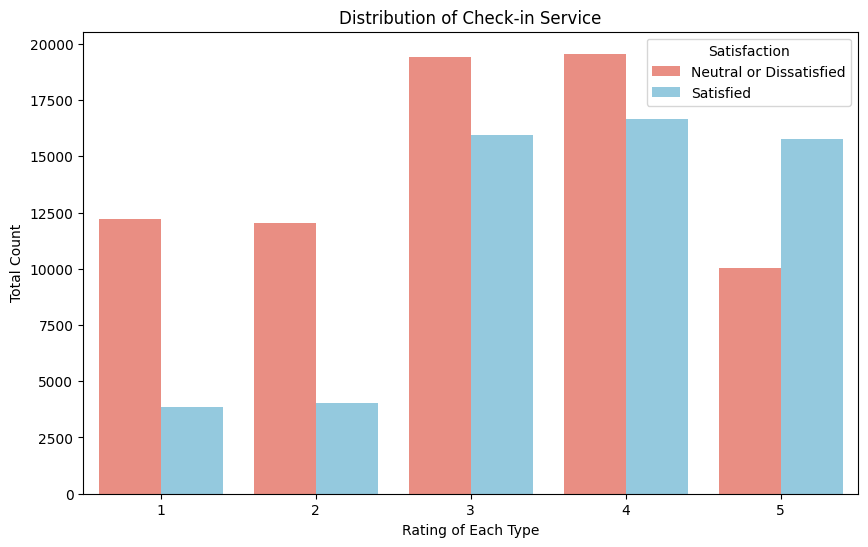

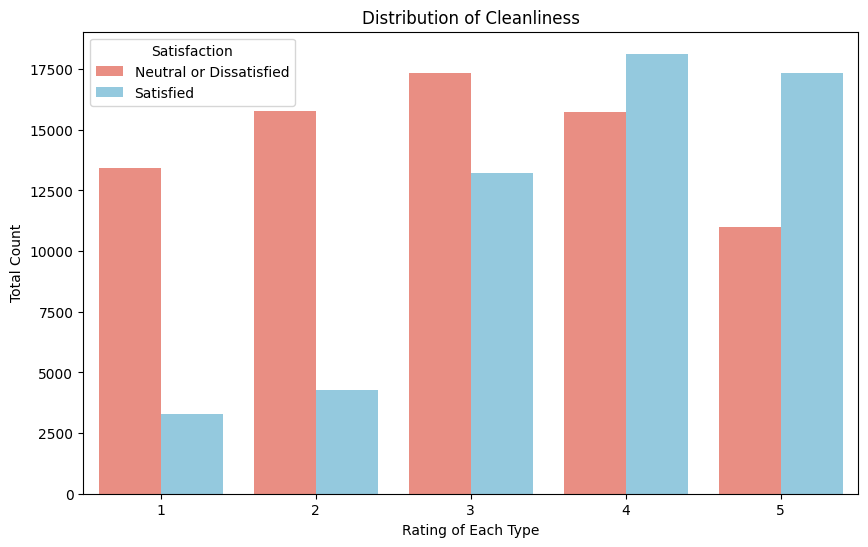

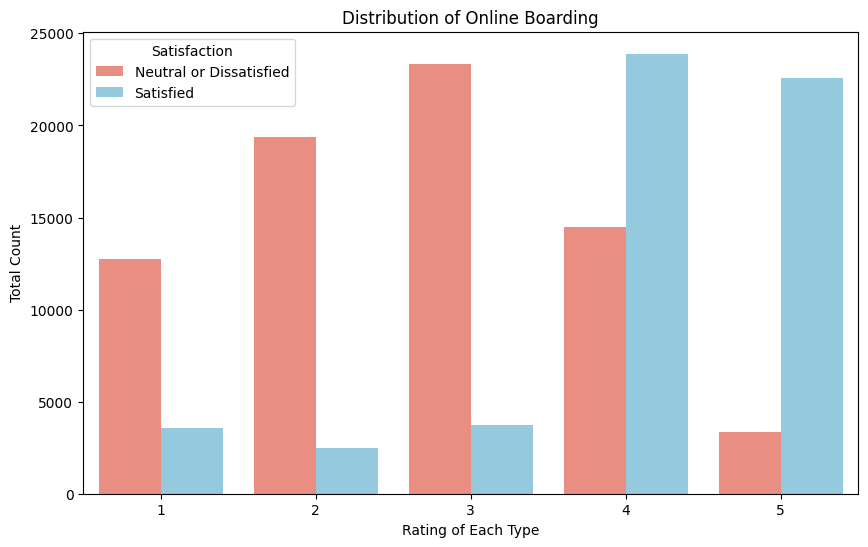

In [70]:
# For loop to create a barplot for each Rating feature to check the distribution of each of them
for i in rating_feat:
    plot_lib.figure(figsize=(10, 6))
    sbn.countplot(data=df, x=i, hue='Satisfaction', palette=['salmon', 'skyblue'])
    
    # Setting the title, labels 
    plot_lib.title('Distribution of {}'.format(i))
    plot_lib.xlabel('Rating of Each Type')
    plot_lib.ylabel('Total Count')
    
    
    # let's print the plot
    plot_lib.show()



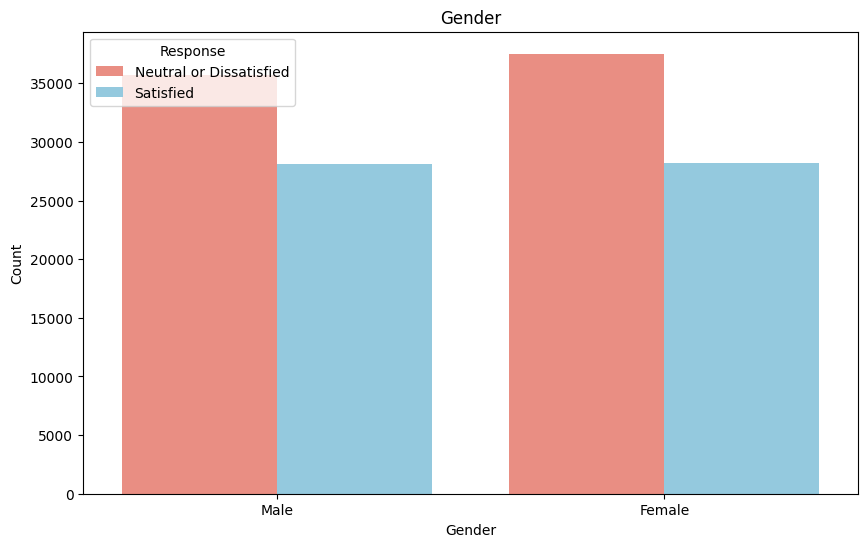

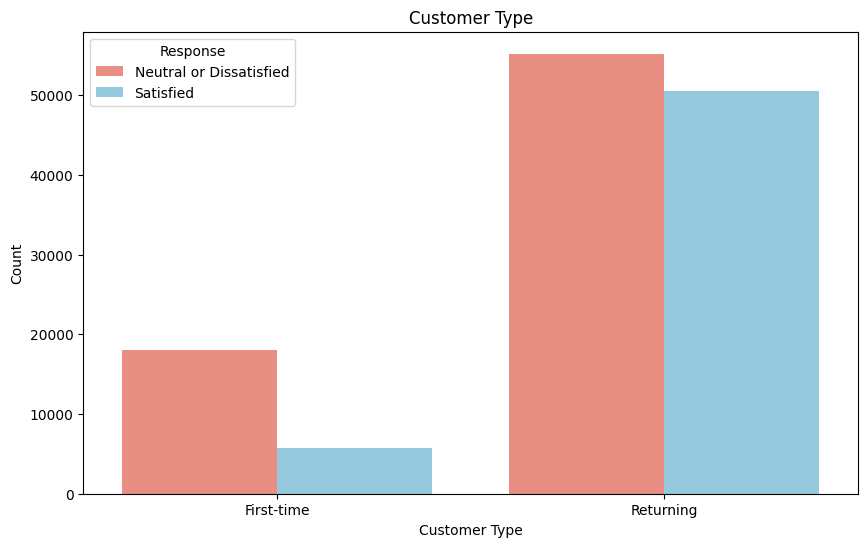

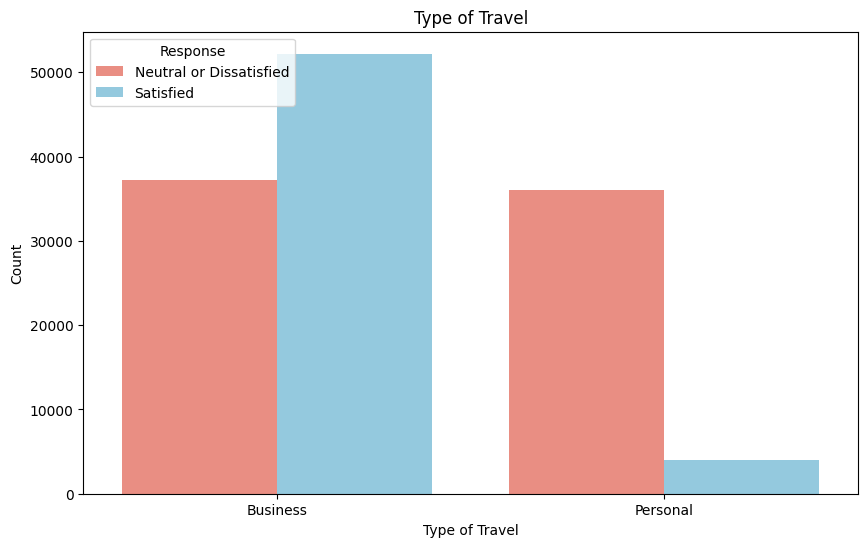

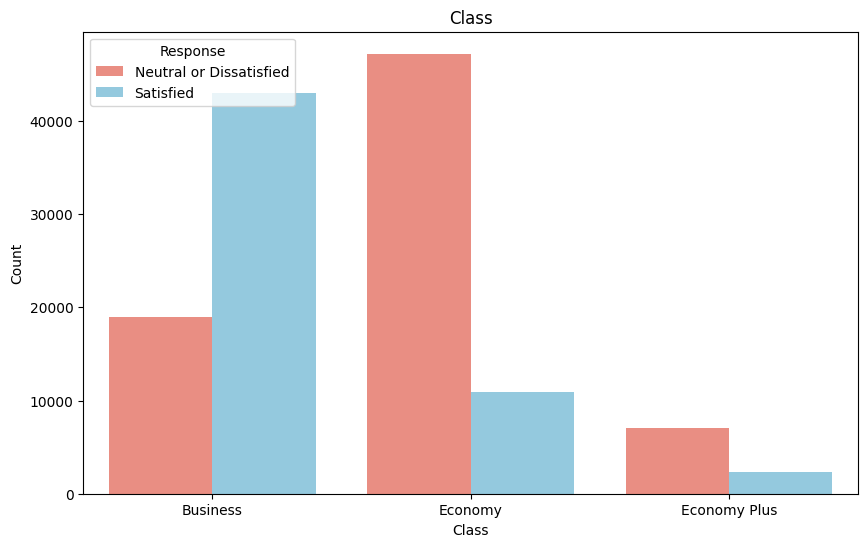

In [71]:
# For loop to create barplot for each Categorical feature with target feature 
for i in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    plot_lib.figure(figsize=(10, 6))
    sbn.countplot(data=df, x=i, hue='Satisfaction', palette=['salmon', 'skyblue'])
    
    # Setting the title, labels
    plot_lib.title(format(i))
    plot_lib.xlabel(i)
    plot_lib.ylabel('Count')
    plot_lib.legend(title='Response', loc='upper left')
    
    # Print the barplot
    plot_lib.show()

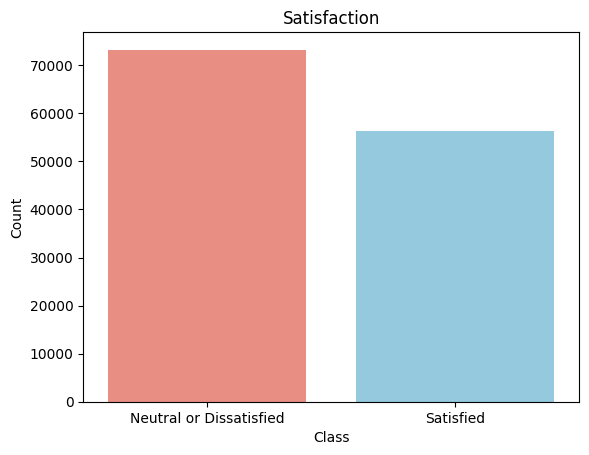

In [72]:
# Let's Visualize the target feature to make sure that it is balanced.
total_counts_class = df['Satisfaction'].value_counts()

# Plotting the bar chart
sbn.barplot(x=total_counts_class.index, y=total_counts_class.values,palette=['salmon', 'skyblue'])
plot_lib.xlabel('Class')
plot_lib.ylabel('Count')
plot_lib.title('Satisfaction')
plot_lib.show()

In [73]:
# Let's break the dataset into two dataframes.
X = df.drop("Satisfaction", axis=1)
y = df["Satisfaction"]

In [74]:
# let's encode and label all the categorical columns to numerical format by assigning a unique integer to each category

# One hot Endocing.
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding.
label_encoder = LabelEncoder()
for i in ['Gender', 'Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [75]:
# Features that can be scale 
selected_features = X[["Age", "Flight Distance", "Departure Delay"]]

# Standard scaling object 
scaler = StandardScaler()

# Fit the selected features with the object of StandardScaling 
scaler.fit(selected_features)

# Transforming the features 
selected_features_scaled = scaler.transform(selected_features)

# Replace the new scaled features with the original column
X[["Age", "Flight Distance", "Departure Delay"]] = selected_features_scaled

X.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class_Business,Class_Economy,Class_Economy Plus
0,1,0.566973,0,0,-0.370115,-0.333311,3,3,4,3,...,2,5,5,5,3,5,5,True,False,False
1,0,-0.292955,1,0,-0.370115,0.299388,2,2,3,5,...,5,5,3,5,2,5,5,True,False,False
2,1,0.103935,1,0,-0.338036,-0.386036,4,4,4,5,...,3,5,5,3,4,3,3,True,False,False
3,1,0.699270,1,0,0.716540,-0.386036,2,2,3,4,...,5,4,4,5,2,5,5,True,False,False
4,0,0.633122,1,0,2.285372,-0.386036,3,3,3,5,...,4,5,4,3,3,3,3,True,False,False


In [76]:
# Data Splitting into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Defining the list of 3 Models to train and evaluate the result
models_list = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [78]:
# Aterative loop over a list of models to perform hyperparameter tuning 

for model in models_list:
    # Grid for hyperparameters 
    param_grid = {}
    if isinstance(model, LogisticRegression):
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
            'solver': ['liblinear', 'lbfgs']      # Algorithm 
        }
    elif isinstance(model, DecisionTreeClassifier):
        param_grid = {
            'max_depth': [None, 10, 20, 30],        # Max depth 
            'min_samples_split': [2, 5, 10, 20],    # Min no of samples required to split a node
            'min_samples_leaf': [1, 2, 4, 8]        # Minimum no of samples required at each leaf node
        }
    elif isinstance(model, RandomForestClassifier):
        param_grid = {
            'n_estimators': [100, 200, 300],        # No of trees 
            'max_depth': [None, 10, 20, 30],        # Maxdepth 
            'min_samples_split': [2, 5, 10, 20],    # Min no of samples required to split a node
            'min_samples_leaf': [1, 2, 4, 8]        # Min no of samples required at each leaf node
        }

In [79]:
# GridSearchCV
grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

    # fitting GridSearchCV
grid_search_cv.fit(X_train, y_train)

    # Priny the Efficient model
best_model = grid_search_cv.best_estimator_
best_params = grid_search_cv.best_params_
best_accuracy = grid_search_cv.best_score_

In [80]:
# Evaluate the models on the X_test testing set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [81]:
 # Display the Efficient model, its hyperparameters, and the accuracy percentage of a model 
print(f"{type(model).__name__}:")
print(f"Best Hyperparameters: {best_params}")
print(f"Cross-Validation Accuracy: {best_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print()

RandomForestClassifier:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Accuracy: 95.07%
Test Accuracy: 95.07%



In [82]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.94      0.98      0.96     14685
              Satisfied       0.97      0.92      0.94     11213

               accuracy                           0.95     25898
              macro avg       0.95      0.95      0.95     25898
           weighted avg       0.95      0.95      0.95     25898



In [83]:
# cross-validation with RandomForestClassifier
scores_cv = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

    # Print cross-validation scores
print("Cross-Validation Scores:")
for i, score in enumerate(scores_cv, 1):
        print(f"Fold {i}: {score:.4f}")

Cross-Validation Scores:
Fold 1: 0.9528
Fold 2: 0.9507
Fold 3: 0.9500
Fold 4: 0.9502
Fold 5: 0.9488


In [84]:
# Calculate and print the standard deviation and mean  of CV scores
cv_mean_score = scores_cv.mean()
cv_std_score = scores_cv.std()
print(f"Mean CV Score: {cv_mean_score:.4f}")
print(f"STD of CV Scores: {cv_std_score:.4f}")

Mean CV Score: 0.9505
STD of CV Scores: 0.0013


# Conclusion :

## Recap:
In this sequence of tasks, following the dataset importation, comprehensive data visualization was conducted to assess feature conditions and identify potential imbalanced classes or missing values. Subsequently, data cleaning and preprocessing were performed, followed by feature engineering through encoding and scaling techniques. Following these steps, three models were trained with hyperparameter tuning using gridsearchCV. Ultimately, the RandomForestClassifier was identified as the optimal model for the dataset outperforming other models in the list.

The RandomForestClassifier demonstrated a test accuracy of 95% and cross-validation accuracy of 95%, indicating strong predictive capability. As we have found test accuracy is very high which means our model is not overfit or there is no data leakage.  Examination of important features highlights significant factors impacting passenger contentment, offering valuable insights for airlines to enhance targeted services. 
The model's consistent performance across cross-validation folds emphasizes its dependability in predicting passenger satisfaction and facilitating strategic decision-making to elevate customer experience.